# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Options Chain Data from Yahoo! Finance

In the previous sections, you have fetched a range of market data on stocks and currencies from Yahoo! Finance.  Additionally, it also offers options chain data for the US equities market. In this notebook, you will learn to get the call and puts options chain data from Yahoo! Finance. 

The notebook is divided into the following parts:
1. [Get Available Expiration Dates](#expiration_dates) 
2. [Options Chain Data](#options_chain)<br>
    2.1. [Get Calls Data](#calls_data)<br>
    2.2. [Get Puts Data](#puts_data)

## Import Libraries

In [1]:
# Import yfinance package
import yfinance as yf

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

<a id='expiration_dates'></a> 
## Get Available Expiration Dates

First, create a ticker object for a particular ticker (stock) for which you want the options chain data. To do that, you need to call the `Ticker` method of `yfinance`.

To get the expiration dates for options of a particular ticker, you need to call the `options` method. 

In [2]:
# Create ticker object for Microsoft
msft = yf.Ticker('MSFT')

# Call the options on the ticker object to get the expiration dates
msft.options

('2021-06-04',
 '2021-06-11',
 '2021-06-18',
 '2021-06-25',
 '2021-07-02',
 '2021-07-09',
 '2021-07-16',
 '2021-08-20',
 '2021-09-17',
 '2021-10-15',
 '2021-11-19',
 '2022-01-21',
 '2022-03-18',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16')

The above data shows the list of all available expiration dates for Microsoft options chain data.

<a id='options_chain'></a> 
## Options Chain Data

To download options data, you can use the `option_chain` method. 

Syntax: 
```python
ticker_object.option_chain(expiration_date)
```
Parameters:

* `expiration_date`: Expiry date in the YYYY-MM-DD format. If none, returns all options data.

You can use `calls` and `puts` methods to get the calls and puts options chain data, respectively.

In [3]:
# Get options chain for specific expiration date
option_chain = msft.option_chain(date=msft.options[0])

<a id='calls_data'></a>
### Get Calls Data

In [4]:
# Get Microsoft calls options chain data
option_chain.calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT210604C00135000,2021-05-19 13:47:31,135.0,105.35,113.65,116.90,0.0,0.0,NaN,21,3.045901,True,REGULAR,USD
1,MSFT210604C00140000,2021-05-21 15:04:18,140.0,106.28,108.55,111.95,0.0,0.0,30.0,33,2.865237,True,REGULAR,USD
2,MSFT210604C00150000,2021-05-21 16:28:04,150.0,95.30,98.60,101.90,0.0,0.0,3.0,7,2.562504,True,REGULAR,USD
3,MSFT210604C00155000,2021-05-21 16:08:35,155.0,90.40,93.60,96.90,0.0,0.0,7.0,7,2.416996,True,REGULAR,USD
4,MSFT210604C00160000,2021-05-03 17:24:47,160.0,91.78,88.50,92.00,0.0,0.0,NaN,7,2.276371,True,REGULAR,USD


The above output shows the call options chain for stock Microsoft. The option chain shows the bid, ask, and last traded price for different strike prices with date and time. It also shows the volume and open interest data for all strike prices.

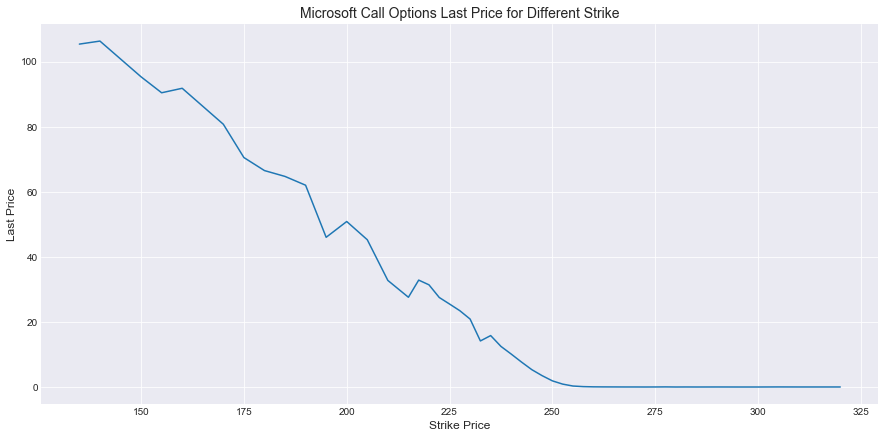

In [5]:
# Plot call strike price vs call last traded price 
plt.figure(figsize=(15, 7))
plt.plot(option_chain.calls.strike, option_chain.calls.lastPrice)
plt.xlabel('Strike Price', fontsize =12)
plt.ylabel('Last Price', fontsize=12)
plt.title('Microsoft Call Options Last Price for Different Strike', fontsize=14)
plt.show()

The above chart shows the Microsoft call options last traded price for different strike prices. As you can see, the call options price gradually falls as the strike price increases. Or in other words, options call price is higher for in the money options than out of the money options.

<a id='puts_data'></a>
### Get Puts Data

In [6]:
# Get Microsoft puts options chain data
option_chain.puts.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT210604P00135000,2021-05-17 04:01:02,135.0,0.06,0.0,0.05,0.00,0.00000,NaN,30,2.062505,False,REGULAR,USD
1,MSFT210604P00140000,2021-05-24 19:54:40,140.0,0.01,0.0,0.05,0.00,0.00000,10.0,45,1.937500,False,REGULAR,USD
2,MSFT210604P00145000,2021-05-19 15:40:54,145.0,0.03,0.0,0.14,0.00,0.00000,NaN,5,2.039067,False,REGULAR,USD
3,MSFT210604P00150000,2021-05-28 18:04:12,150.0,0.01,0.0,0.01,-0.02,-66.66667,1.0,7,1.500002,False,REGULAR,USD
4,MSFT210604P00155000,2021-05-20 17:01:53,155.0,0.02,0.0,0.02,0.00,0.00000,1.0,31,1.500002,False,REGULAR,USD


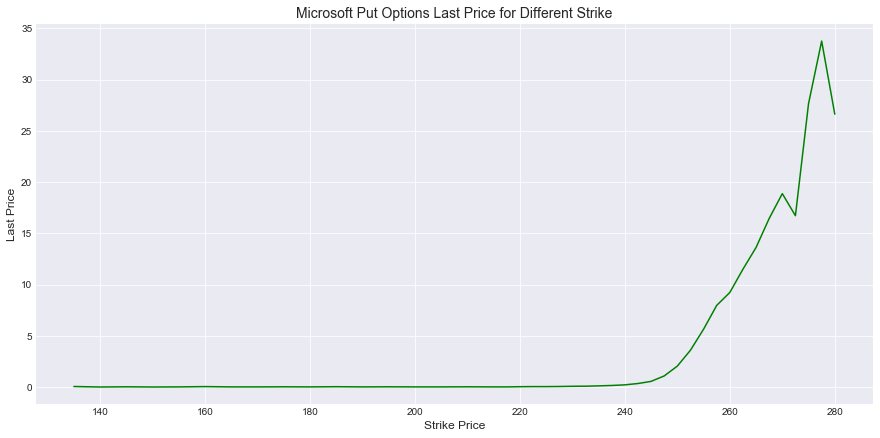

In [7]:
# Plot put strike price vs put last traded price
plt.figure(figsize=(15, 7))
plt.plot(option_chain.puts.strike, option_chain.puts.lastPrice, color='g')
plt.xlabel('Strike Price', fontsize=12)
plt.ylabel('Last Price', fontsize=12)
plt.title('Microsoft Put Options Last Price for Different Strike', fontsize=14)
plt.show()

The above chart shows the Microsoft puts options last traded price for different strike prices. As you can see, the puts options price gradually rises as the strike price increases or the strike price goes from out of the money to in the money.

In the next section, you will learn to fetch stock fundamental data. <br><br>